* Let's take a deeper dive into the datasets underlying The Pudding “Film Dialogue” article https://pudding.cool/2017/03/film-dialogue/.

* Create a new jupyter notebook and read in the three datasets from the Github repository https://github.com/matthewfdaniels/scripts/. 

* Take a look at the documentation in the repository and discuss what you think each file contains.

* Once you've loaded in the data into the notebook, discuss what data you think the columns contain and check if there's any missing data.

* Try to answer the following questions:

   * How could we tell if the amount of dialogue was increasing over time in movies? How might this influence the assessment about the breakdown of gender dialogue?
   * How could test if there was any relationship between the film’s gross value and the amount of dialogue in the film?
   * To answer these questions you'll need to merge, aggregate, and calculate some basic stats for these datasets.
   * As a bonus, try creating a plot of visualize the answer to each of these questions.


In [28]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

### 1. Read in the csv as df

In [3]:
df1 = pd.read_csv('character_list5.csv')
df2 = pd.read_csv('character_mapping.csv')
df3 = pd.read_csv('meta_data7.csv')

In [4]:
df1.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [5]:
df1.shape

(23048, 5)

In [6]:
df2.head()

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [7]:
df3.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [14]:
df3.shape

(1662, 6)

### 2. Interpret each dataframe

* df1: character_list5.csv - this is the data that powers all of the calculations on polygraph.cool/films. It uses the most accurate script that we can find for a given film.
* df2: character_mapping.csv - it maps the character from scipt to the ones in the database, but I am wondering about the accuracy of thsi approach.
* df3: meta_data7.csv - this is unique list of IMDB_IDs from the character_list file, with additional meta data, such as release year and domestic, inflation-adjusted gross.


### 3. Find Missing data (only checking NaN, not checking non-standard missing data)

In [8]:
df1.isnull().sum()  # We can see that df1 has a lot of missing ages

script_id                 0
imdb_character_name       2
words                     0
gender                    0
age                    4785
dtype: int64

In [9]:
df2.isnull().sum()  # df2 has some missing characters and character match

script_id                                  0
imdb_id                                    0
character_from_script                     53
closest_character_name_from_imdb_match    64
closest_imdb_character_id                  0
dtype: int64

In [10]:
df3.isnull().sum()  #  We find many lines that do not have gross

script_id       0
imdb_id         0
title           0
year            0
gross         338
lines_data      0
dtype: int64

### 4. Finding dialogue vs. time && gross vs. amount of dialogue

In [11]:
# drop all the rows that have NaN value

df_list = [df1, df2, df3]
for item in df_list:
    item.dropna(inplace=True)

In [17]:
df3.sort_values(by='script_id')

,script_id,imdb_id,title,year,gross,lines_data
1496,280,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
7,623,tt0179626,15 Minutes,2001,37.0,7777777777777777777777773677777774457777777777...
10,625,tt0062622,2001: A Space Odyssey,1968,376.0,7777734457575677777777777777777777777777777777...
14,630,tt0307901,25th Hour,2002,19.0,7777775254554345777756357747777777777777657777...
49,633,tt1019452,A Serious Man,2009,10.0,1456767771566776776457777777776355454466743477...
...,...,...,...,...,...,...
174,9245,tt0185183,Battlefield Earth,2000,34.0,67777777777777777777777777777777776777776
1694,9246,tt1234548,The Men Who Stare at Goats,2009,37.0,7775556777777777777777777777777777777777777777...
848,9247,tt1327773,Lee Daniels' The Butler,2013,125.0,7647777775535677135336777777776564677735547237...
856,9253,tt1228987,Let Me In,2010,13.0,5517774521445444575544574354375004344374367646...


In [21]:
# Get the length of the sampled lines of data

len = [len(item) for item in df3['lines_data']]

df3['data_len'] = len
df3

,script_id,imdb_id,title,year,gross,lines_data,data_len
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,255
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...,255
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...,109
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340,30
5,6537,tt0450385,1408,2007,91.0,37677777777777777776777737566646444336777661,44
...,...,...,...,...,...,...,...
1994,5517,tt3312830,Youth,2015,2.0,7777777743477777777777777777777654336667757777...,83
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...,255
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...,96
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...,119


In [25]:
# Compare the lines of data with the year in a simple linear regression

results = smf.ols('data_len ~ year', data=df3).fit()
results.summary()

# It shows that the amount of sampled dialogue does not have strong relationship with the year change

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               data_len   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004841
Date:                Wed, 30 Mar 2022   Prob (F-statistic):              0.945
Time:                        22:22:44   Log-Likelihood:                -9081.6
No. Observations:                1662   AIC:                         1.817e+04
Df Residuals:                    1660   BIC:                         1.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.5867    267.207      0.492      0.622    -392.512     655.685
year          -0.0093      0.134     -0.070      0.945      -0.271       0.253
==============================================================================
Omnibus:                      226.508   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.488
Skew:                           1.049   Prob(JB):                     5.69e-71
Kurtosis:                       3.516   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Since the term: "amount of dialogue" is ambiguous, I will test the relationship between gross and the year produced.

results = smf.ols('gross ~ year', data=df3).fit()
results.summary()

# As we can see the p value in this test is $0 < 0.001 < \alpha=0.05$, thus we can reject the null hypothesis and prove that there is association between the gross and year it is produced.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           8.33e-29
Time:                        22:25:37   Log-Likelihood:                -10515.
No. Observations:                1662   AIC:                         2.103e+04
Df Residuals:                    1660   BIC:                         2.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7289.6132    633.133     11.514      0.000    6047.790    8531.437
year          -3.5914      0.316    -11.350      0.000      -4.212      -2.971
==============================================================================
Omnibus:                     1297.840   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36114.841
Skew:                           3.431   Prob(JB):                         0.00
Kurtosis:                      24.781   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

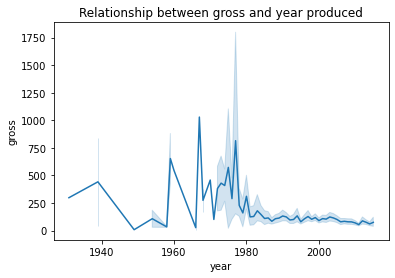

In [32]:
sns.lineplot(x = 'year', y ='gross',data = df3)
plt.title('Relationship between gross and year produced')
plt.show()

# One thing that worth noticing is that we have more data for films after 1980

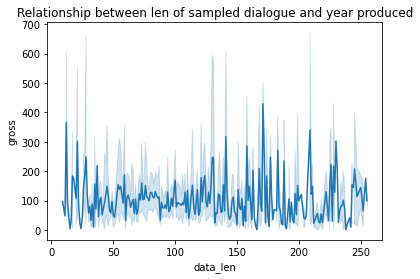

In [33]:
sns.lineplot(x = 'data_len', y ='gross',data = df3)
plt.title('Relationship between len of sampled dialogue and year produced')
plt.show()